<a href="https://colab.research.google.com/github/Wandafebrr/PCVK_2023/blob/main/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Template Matching

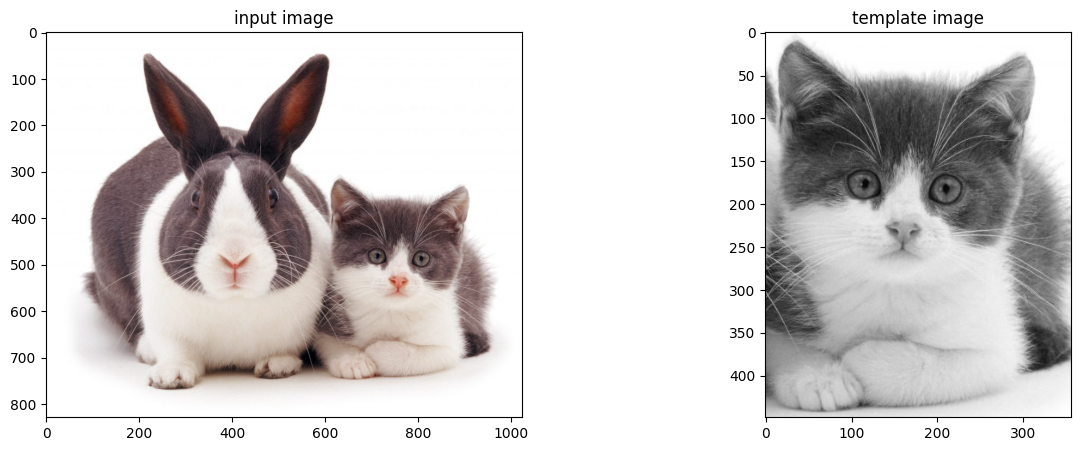

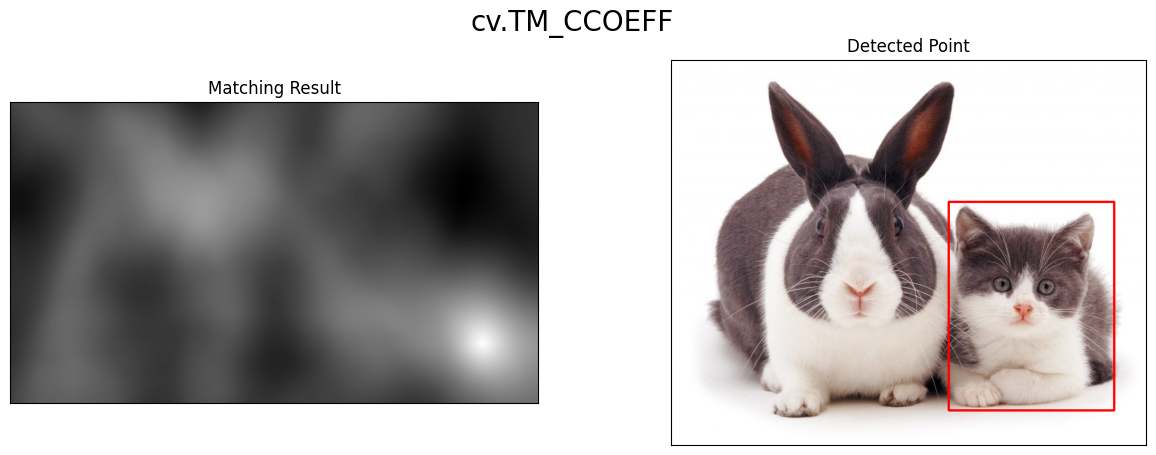

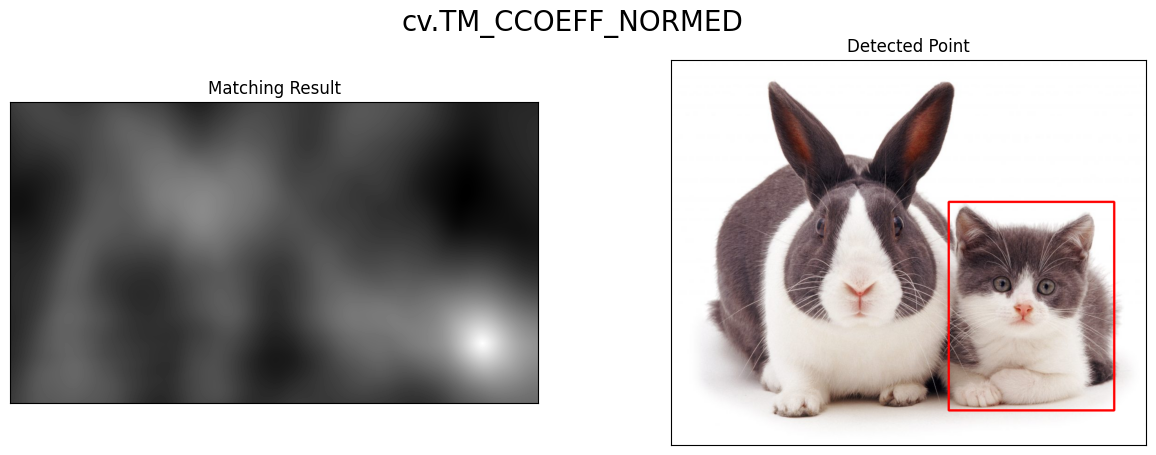

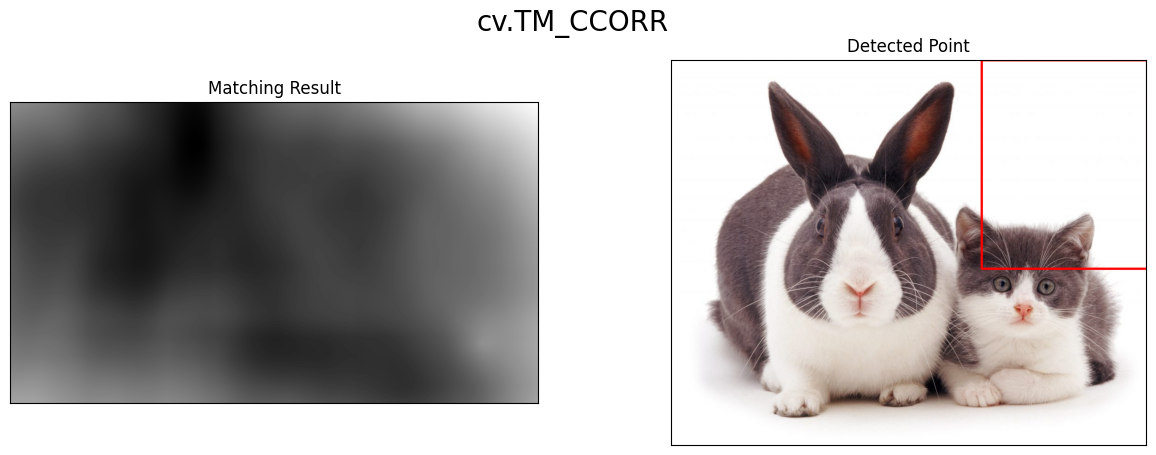

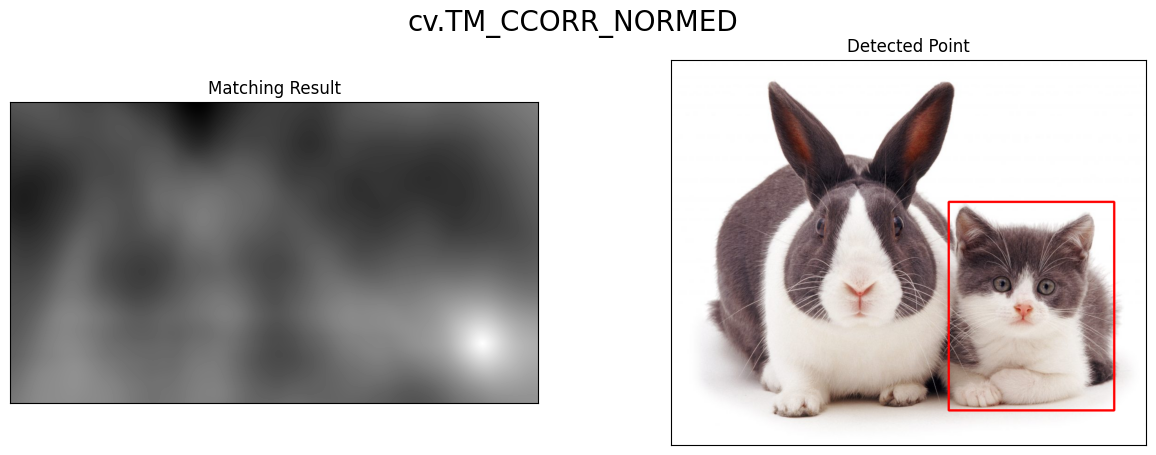

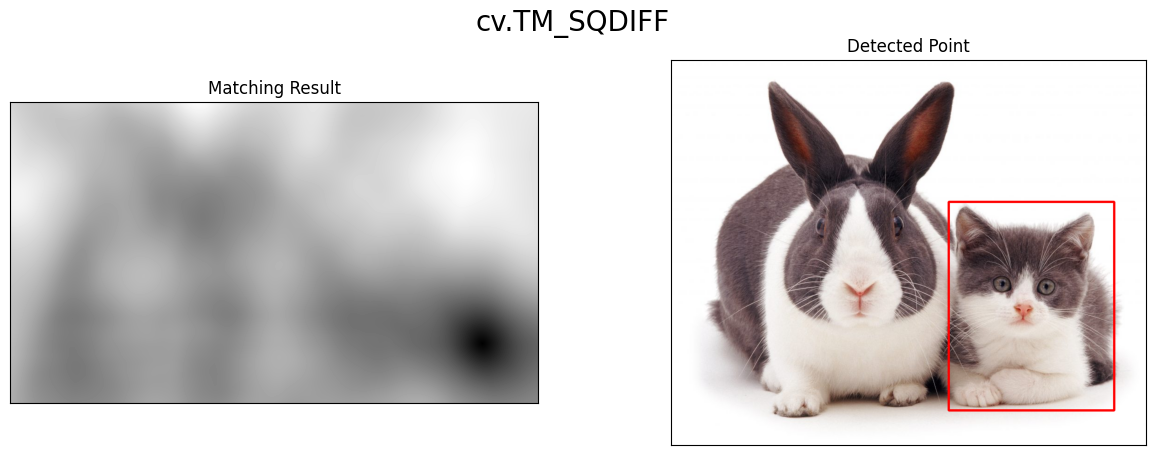

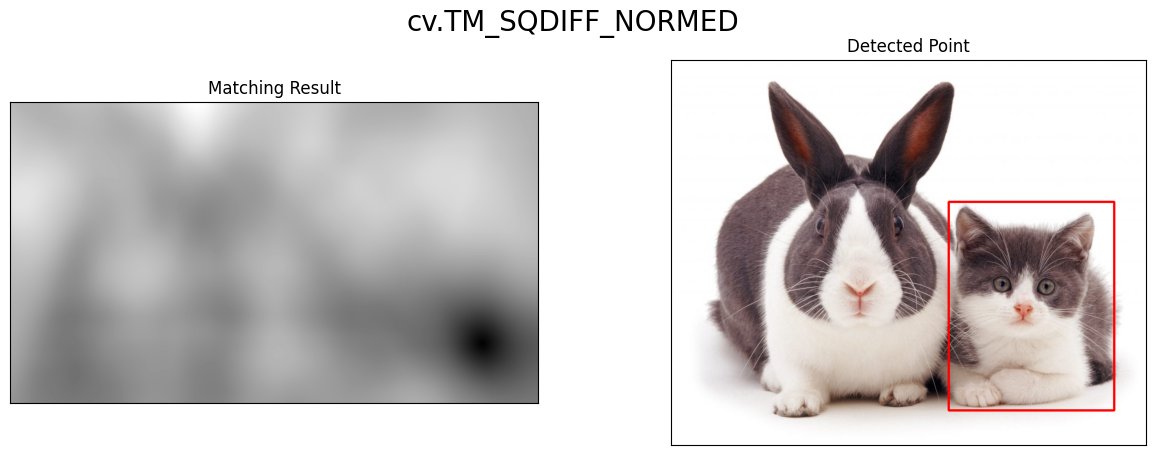

In [3]:
#load citra input
img = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/Object Detection/cat2_templatejpg.jpg',0)
#dimensi citra
w, h = template.shape[::-1]

#print input image dan template
f, axarr = plt.subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

#membuat array untuk menampung 6 jenis metode template matching yang disediakan openCV
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

#perulangan untuk setiap elemen yang ada di array methods
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    #memanggil metode template matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, (0, 0, 255), 3)
    plt.figure(figsize = (15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)

    plt.show()

total objects found  6


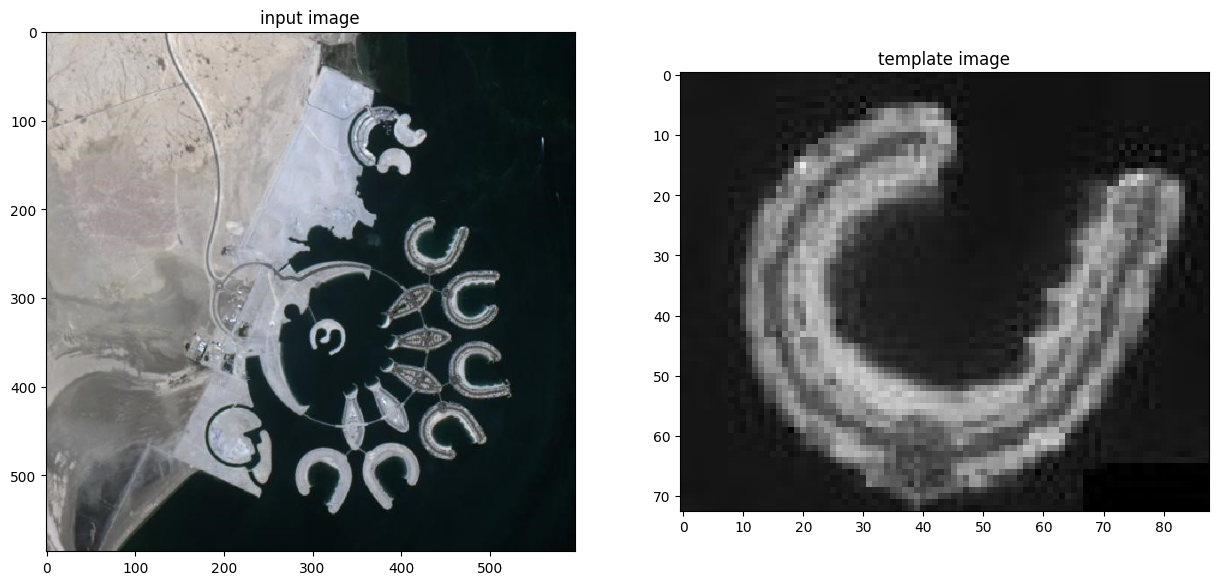

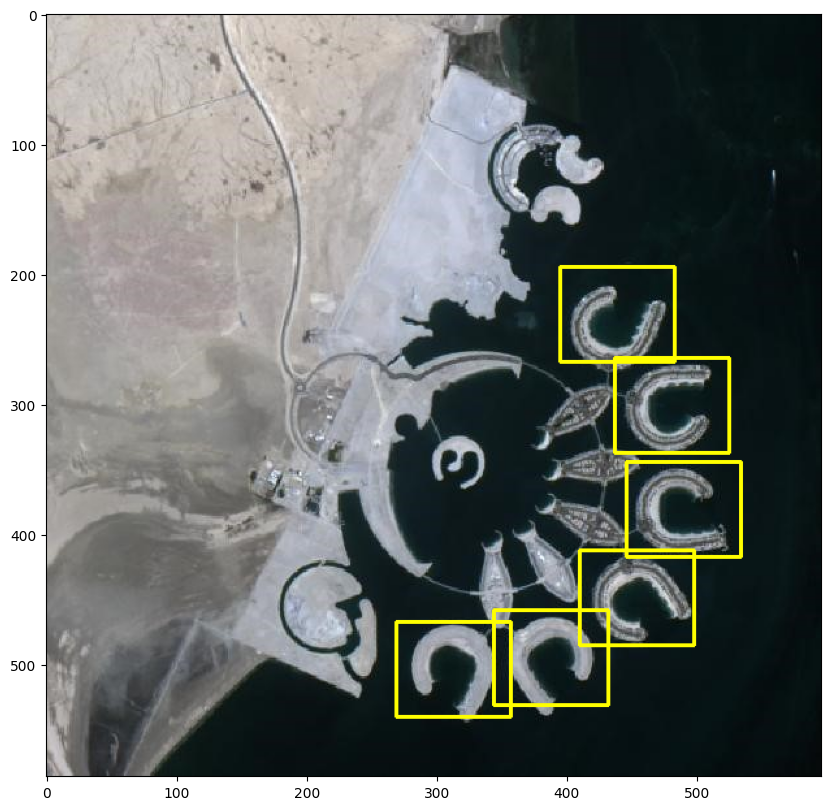

In [4]:
#load citra input
img = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/Object Detection/bahrain.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#load citra template
template = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/Object Detection/bahrain-template.jpg',0)
#dimensi citra
w, h = template.shape[::-1]

f, axarr = plt.subplots(1,2,figsize=(15,35)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)

threshold = 0.45
loc = np.where( res >= threshold)

#membuat 2 list untuk menampung koordinat x,y dan variable count untuk menampung jumlah objek
lspoint=[]
lspoint2=[]
count = 0

for pt in zip(*loc[::-1]):
	#cek apakah koordinat sudah terdapat pada list, jika sudah.. skip
	if pt[0] not in lspoint and pt[1] not in lspoint2:
		##menggambar kotak batas
		cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
		for i in range(((pt[0])-9), ((pt[0])+9),1):
			#masukkan koordinat x
			lspoint.append(i)
		for k in range(((pt[1])-9), ((pt[1])+9),1):
			#masukkan koordinat y
			lspoint2.append(k)
		count+=1
	else:
		continue
print ("total objects found ", count)

plt.figure(figsize=(10,45))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# edge detection
